In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import shap

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("D:/Swinburne/Sem 4/Technology Application Project/default/CLient_Data.csv")

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# Example of outlier removal in LIMIT_BAL using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[z_scores < 3]  # Threshold is 3 standard deviations

In [10]:
# Example of outlier removal in LIMIT_BAL using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[z_scores < 3]  # Threshold is 3 standard deviations

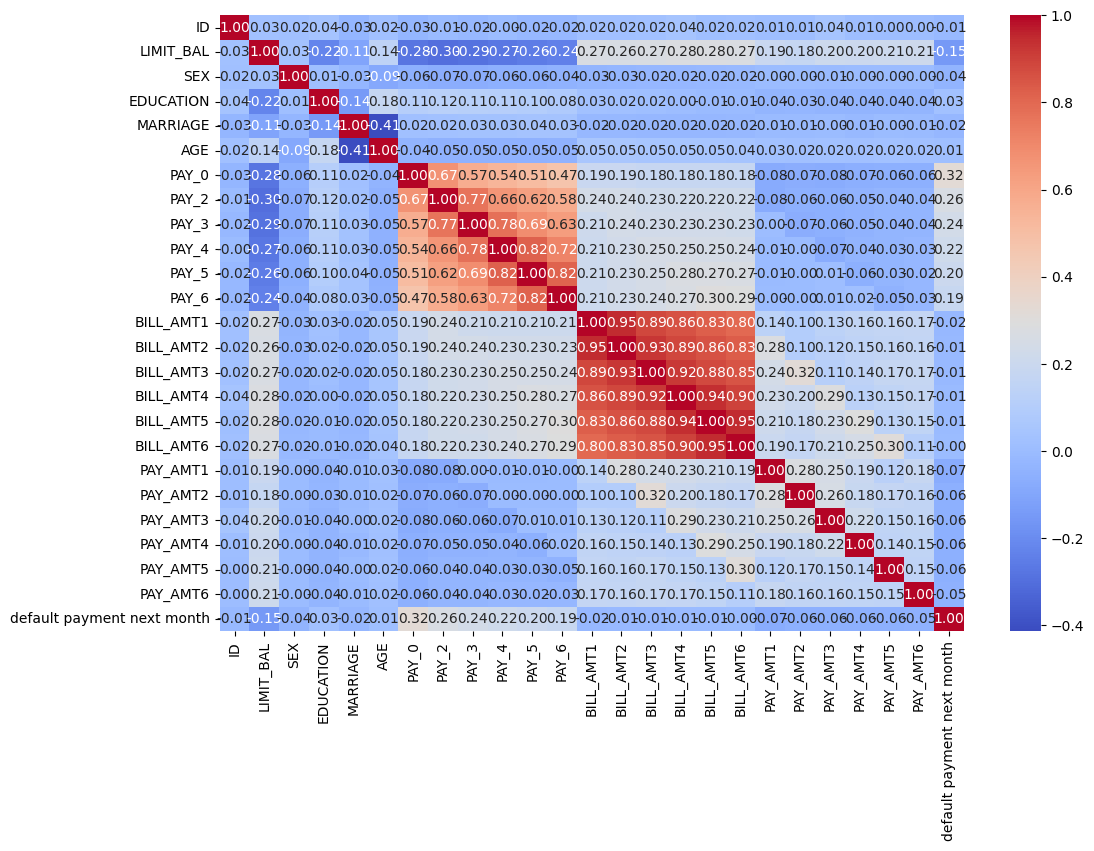

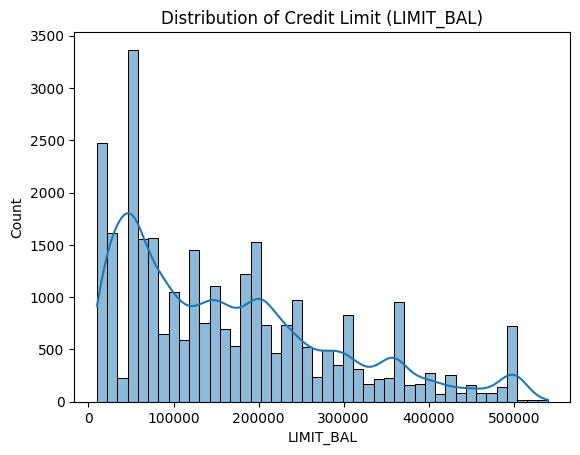

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Distribution of LIMIT_BAL
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.show()

In [12]:
# Assume 'default payment next month' is the target column in your dataset, where 1 indicates fraud and 0 indicates non-fraud.
no_fraud_count = df[df['default payment next month'] == 0].shape[0]
fraud_count = df[df['default payment next month'] == 1].shape[0]

# Calculate the proportions
total_count = no_fraud_count + fraud_count
no_fraud_proportion = no_fraud_count / total_count
fraud_proportion = fraud_count / total_count

# Display the counts and proportions
print(f"Non-Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Non-Fraud Proportion: {no_fraud_proportion:.2%}")
print(f"Fraud Proportion: {fraud_proportion:.2%}")

Non-Fraud Count: 23231
Fraud Count: 6618
Non-Fraud Proportion: 77.83%
Fraud Proportion: 22.17%


C:\Users\DELL\AppData\Local\Temp\ipykernel_8128\2530517538.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')


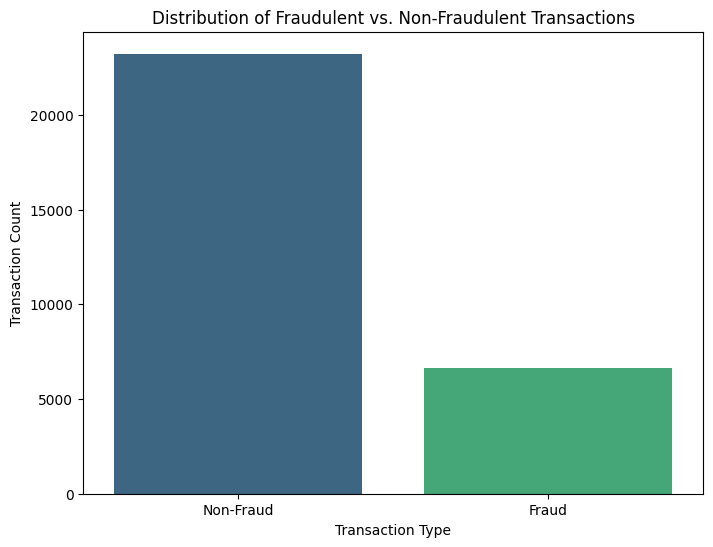

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
# Assuming 'default payment next month' column indicates fraud status (1 = fraud, 0 = non-fraud)
# and 'trans_date' indicates transaction date

# Bar Chart: Distribution of Fraud vs Non-Fraud Transactions
fraud_counts = df['default payment next month'].value_counts()
fraud_labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

# 1. Feature Engineering & Model Implement

In [14]:
# Average payment amount across billing cycles
df['avg_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Total payment amount across billing cycles
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

# Average payment amount made
df['avg_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Total payment amount made
df['total_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

In [15]:
# Utilization for each billing month
for i in range(1, 7):
    df[f'credit_utilization_{i}'] = df[f'BILL_AMT{i}'] / df['LIMIT_BAL']

# Average credit utilization across billing cycles
df['avg_credit_utilization'] = df[[f'credit_utilization_{i}' for i in range(1, 7)]].mean(axis=1)

In [16]:
# Calculate delayed payment frequency
df['total_late_payments'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Average delay in payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Count of severe delays (over 2 months)
df['severe_delays'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x >= 2).sum(), axis=1)


In [17]:
# Trend in bill amounts (difference between consecutive billing cycles)
df['bill_amt_trend'] = df['BILL_AMT1'] - df['BILL_AMT6']

# Trend in payment amounts (difference between first and last payments)
df['pay_amt_trend'] = df['PAY_AMT1'] - df['PAY_AMT6']

# Difference between payment and bill amounts to measure ability to cover bills
df['pay_vs_bill_trend'] = df['total_pay_amt'] - df['total_bill_amt']

In [18]:
# Average Delay in Payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Total Number of Defaults
df['total_defaults'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Payment Trends (Example: Ratio of last to first payment amount)
df['payment_trend'] = df['PAY_AMT6'] / (df['PAY_AMT1'] + 1)  # Adding 1 to avoid division by zero

In [19]:
# Ratio of average payment to credit limit
df['payment_limit_ratio'] = df['avg_pay_amt'] / df['LIMIT_BAL']

# Ratio of total payments to total bills
df['pay_bill_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)  # +1 to avoid division by zero

# Ratio of average delay to age (normalized delay)
df['delay_age_ratio'] = df['avg_delay'] / (df['AGE'] + 1)

In [20]:
# Difference between credit limit and most recent bill amount
df['limit_vs_recent_bill'] = df['LIMIT_BAL'] - df['BILL_AMT1']

# Difference between most recent bill and previous bill
df['recent_bill_difference'] = df['BILL_AMT1'] - df['BILL_AMT2']

# Difference between most recent payment and previous payment
df['recent_payment_difference'] = df['PAY_AMT1'] - df['PAY_AMT2']

In [21]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

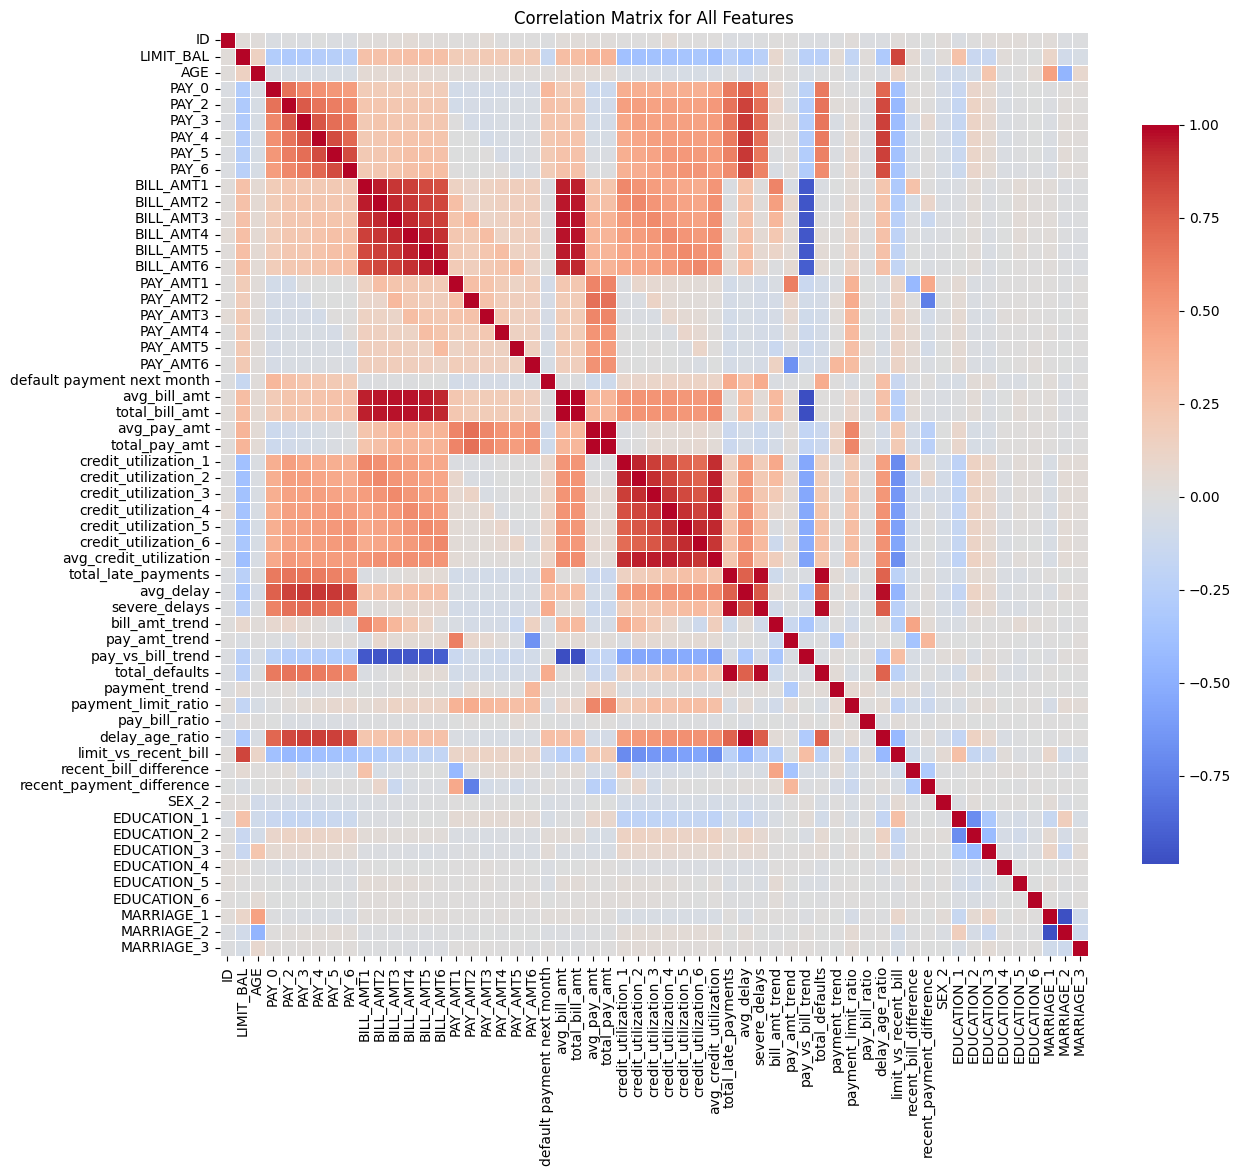

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix for All Features')
plt.show()

In [23]:
correlation_matrix

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,1.000000,0.026295,0.018691,-0.030202,-0.010653,-0.018251,-0.002239,-0.021559,-0.019943,0.019030,...,0.018927,-0.025492,0.002459,0.017113,0.022976,0.027614,0.009065,0.027164,-0.024262,-0.015273
LIMIT_BAL,0.026295,1.000000,0.142166,-0.276190,-0.302872,-0.292306,-0.272952,-0.255147,-0.239949,0.269556,...,0.027930,0.260895,-0.147897,-0.141578,0.026344,0.000198,-0.005567,0.105560,-0.092859,-0.055779
AGE,0.018691,0.142166,1.000000,-0.039171,-0.050207,-0.053216,-0.049714,-0.053951,-0.048931,0.052062,...,-0.090213,-0.100992,-0.077621,0.231762,-0.011104,0.000728,0.037856,0.449410,-0.466702,0.083190
PAY_0,-0.030202,-0.276190,-0.039171,1.000000,0.671621,0.573612,0.538411,0.509059,0.474035,0.189495,...,-0.058143,-0.142654,0.099205,0.058538,-0.028092,-0.008613,-0.005933,-0.016514,0.013391,0.017261
PAY_2,-0.010653,-0.302872,-0.050207,0.671621,1.000000,0.766161,0.661708,0.622520,0.575060,0.237797,...,-0.071083,-0.169572,0.122817,0.064204,-0.034557,-0.013441,-0.006259,-0.022703,0.020475,0.011569
PAY_3,-0.018251,-0.292306,-0.053216,0.573612,0.766161,1.000000,0.777250,0.686717,0.632441,0.210572,...,-0.066162,-0.160710,0.116277,0.062039,-0.032390,-0.016640,-0.007171,-0.030744,0.027365,0.016570
PAY_4,-0.002239,-0.272952,-0.049714,0.538411,0.661708,0.777250,1.000000,0.819846,0.716357,0.206308,...,-0.060267,-0.152659,0.110655,0.058085,-0.032859,-0.012516,-0.006799,-0.030376,0.027176,0.017399
PAY_5,-0.021559,-0.255147,-0.053951,0.509059,0.622520,0.686717,0.819846,1.000000,0.816884,0.209008,...,-0.055197,-0.139153,0.103777,0.049212,-0.029467,-0.010230,-0.008922,-0.034128,0.032167,0.011327
PAY_6,-0.019943,-0.239949,-0.048931,0.474035,0.575060,0.632441,0.716357,0.816884,1.000000,0.210128,...,-0.044295,-0.125281,0.098702,0.040502,-0.025384,-0.019214,-0.012839,-0.032068,0.029069,0.016225
BILL_AMT1,0.019030,0.269556,0.052062,0.189495,0.237797,0.210572,0.206308,0.209008,0.210128,1.000000,...,-0.033279,-0.028367,0.034842,-0.022085,0.001267,0.039175,0.018207,0.023675,-0.019872,-0.010767


In [24]:
# Separate features and target
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("XGBoost Feature Importances:")
print(xgb_feature_importances)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
severe_delays                0.210079
PAY_0                        0.154399
total_late_payments          0.146881
avg_bill_amt                 0.017442
EDUCATION_6                  0.014591
limit_vs_recent_bill         0.014426
avg_pay_amt                  0.014151
PAY_2                        0.012094
BILL_AMT1                    0.011955
EDUCATION_5                  0.011722
avg_credit_utilization       0.011395
MARRIAGE_2                   0.011227
pay_vs_bill_trend            0.011139
credit_utilization_2         0.011044
PAY_AMT2                     0.010780
PAY_AMT1                     0.010708
pay_bill_ratio               0.010215
BILL_AMT4                    0.010029
PAY_3                        0.009930
delay_age_ratio              0.009881
credit_utilization_3         0.009862
PAY_AMT3                     0.009714
BILL_AMT5                    0.009712
recent_bill_difference       0.009687
credit_utilization_1         0.009628
BILL_AMT2            

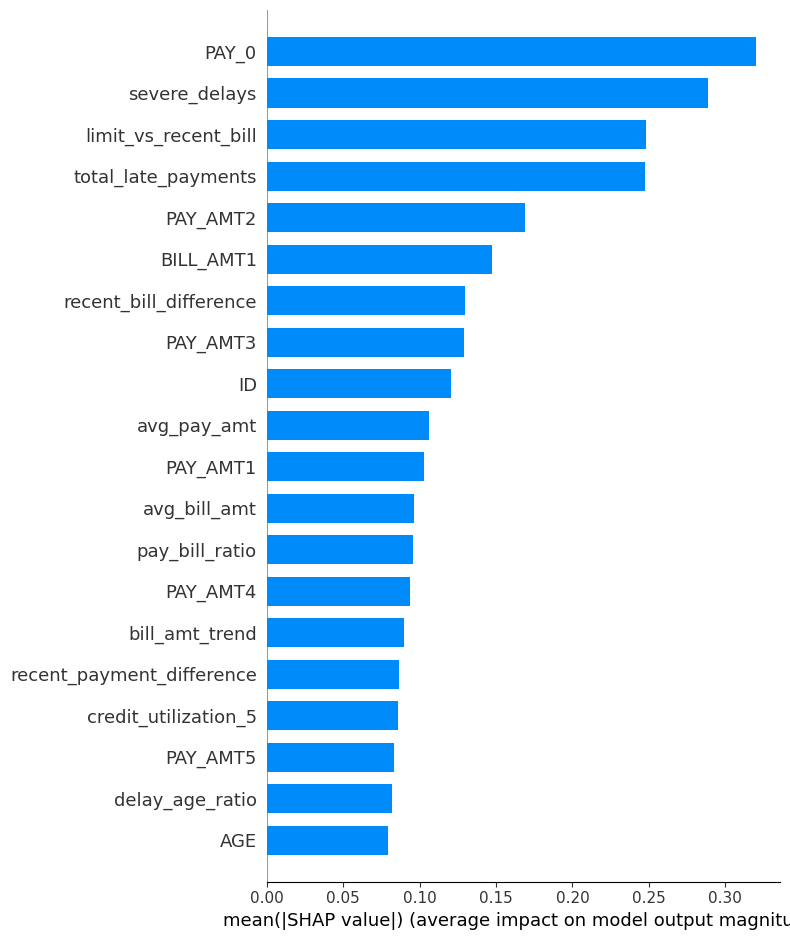

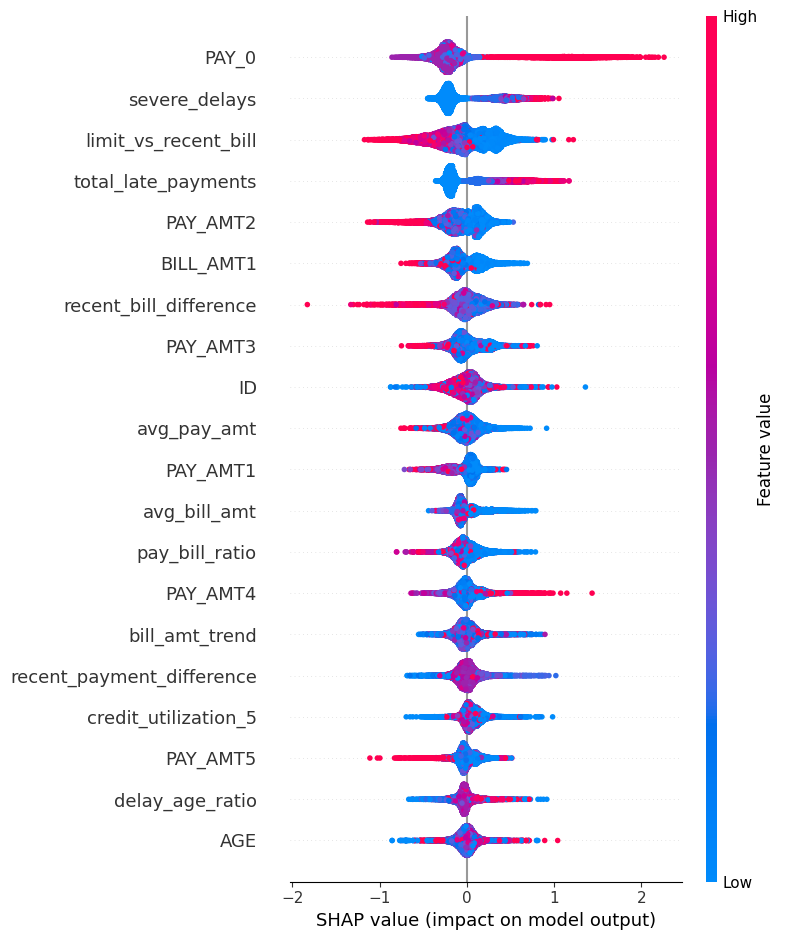

In [26]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values to show feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed SHAP summary plot (to see the effect of each feature on predictions)
shap.summary_plot(shap_values, X_train)

In [27]:
shap_importances = pd.DataFrame(list(zip(X.columns, shap_values.mean(0).tolist())), columns=["Feature", "Mean SHAP Value"])
shap_importances = shap_importances.sort_values(by="Mean SHAP Value", ascending=False)

print("SHAP Feature Importances:")
print(shap_importances)

SHAP Feature Importances:
                      Feature  Mean SHAP Value
29       credit_utilization_5         0.057496
31     avg_credit_utilization         0.031280
6                       PAY_4         0.011696
39              payment_trend         0.009023
12                  BILL_AMT4         0.007617
27       credit_utilization_3         0.007256
18                   PAY_AMT4         0.003716
33                  avg_delay         0.002742
47                EDUCATION_1         0.001255
54                 MARRIAGE_2         0.000276
55                 MARRIAGE_3         0.000151
22             total_bill_amt         0.000000
38             total_defaults         0.000000
24              total_pay_amt         0.000000
52                EDUCATION_6        -0.000284
49                EDUCATION_3        -0.000340
45  recent_payment_difference        -0.000462
48                EDUCATION_2        -0.001185
50                EDUCATION_4        -0.001216
46                      SEX_2     

In [28]:
# Step 4: Compare XGBoost Feature Importances and SHAP Feature Importances
# Identify the best feature based on both methods

best_feature_xgb = xgb_feature_importances.idxmax()
best_feature_shap = shap_importances['Feature'].iloc[0]

print(f"Best Feature according to XGBoost: {best_feature_xgb}")
print(f"Best Feature according to SHAP: {best_feature_shap}")

Best Feature according to XGBoost: severe_delays
Best Feature according to SHAP: credit_utilization_5


Top 5 Features according to XGBoost:
severe_delays          0.210079
PAY_0                  0.154399
total_late_payments    0.146881
avg_bill_amt           0.017442
EDUCATION_6            0.014591
dtype: float32
Top 5 Features according to SHAP:
                   Feature  Mean SHAP Value
29    credit_utilization_5         0.057496
31  avg_credit_utilization         0.031280
6                    PAY_4         0.011696
39           payment_trend         0.009023
12               BILL_AMT4         0.007617


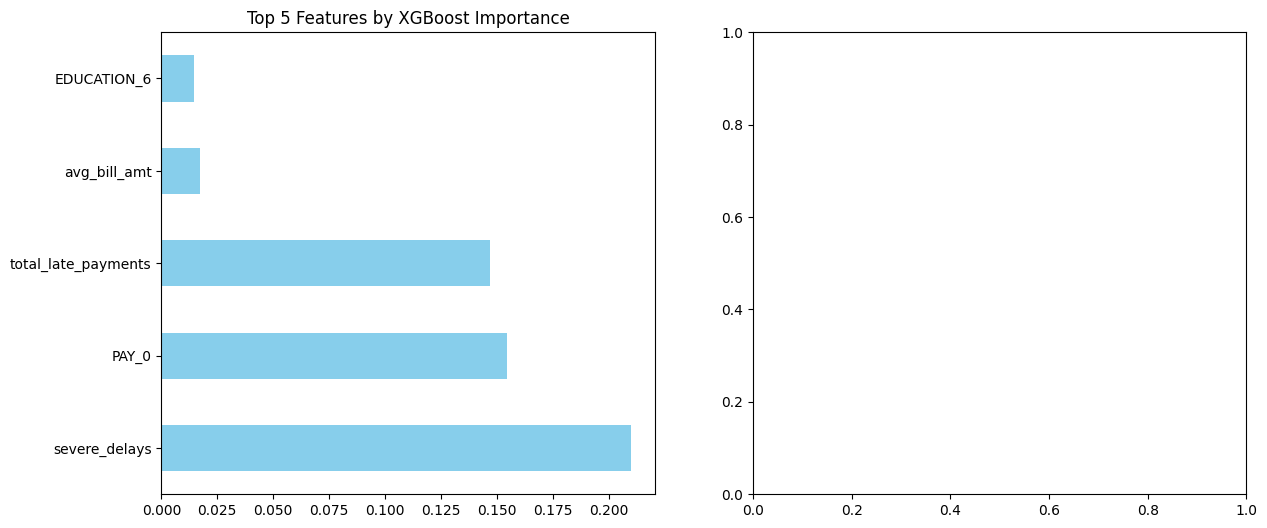

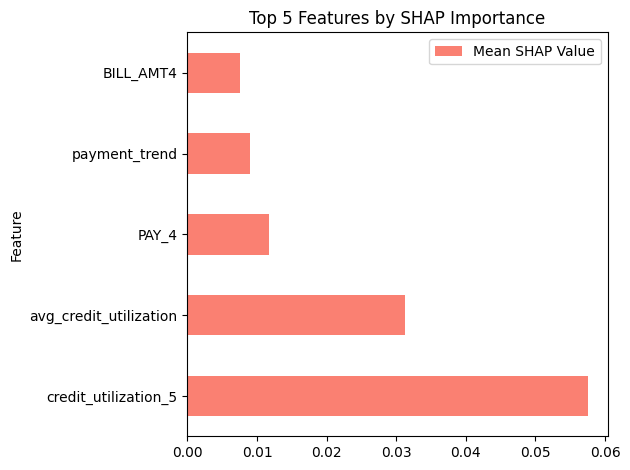

In [29]:
# Top 5 features according to XGBoost (highest importance)
top_5_features_xgb = xgb_feature_importances.head(5)
print("Top 5 Features according to XGBoost:")
print(top_5_features_xgb)

# Top 5 features according to SHAP (highest mean SHAP value)
top_5_features_shap = shap_importances.head(5)
print("Top 5 Features according to SHAP:")
print(top_5_features_shap)

# Step 5: Plot the top 5 features from XGBoost and SHAP for comparison
plt.figure(figsize=(14, 6))

# Plot XGBoost Top 5 Features
plt.subplot(1, 2, 1)
top_5_features_xgb.plot(kind='barh', color='skyblue')
plt.title('Top 5 Features by XGBoost Importance')

# Plot SHAP Top 5 Features
plt.subplot(1, 2, 2)
top_5_features_shap.plot(kind='barh', x='Feature', y='Mean SHAP Value', color='salmon')
plt.title('Top 5 Features by SHAP Importance')

plt.tight_layout()
plt.show()

In [32]:
X = df.drop(columns=['default payment next month'])  # Remove the target column from features
y = df['default payment next month']

In [33]:
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from numpy import where

def BSMOTE(X, y):
    """
    Function to handle class imbalance using Borderline SMOTE.
    """
    # Summarize original class distribution
    counter = Counter(y)
    print("Original class distribution:", counter)

    # Apply BorderlineSMOTE
    smote = BorderlineSMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Summarize new class distribution
    counter_resampled = Counter(y_resampled)
    print("Resampled class distribution:", counter_resampled)
    return train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Assuming your current feature set is 'X' and target is 'y'
X_train_sm, y_train_sm, = BSMOTE(X_train, y_train)

Original class distribution: Counter({0: 16312, 1: 4582})
Resampled class distribution: Counter({0: 16312, 1: 16312})


ValueError: too many values to unpack (expected 2)

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot as plt
from numpy import where

def BSMOTE(X, y):
    """
    Function to handle class imbalance using Borderline SMOTE.
    """
    # Summarize original class distribution
    counter = Counter(y)
    print("Original class distribution:", counter)

    # Apply BorderlineSMOTE
    smote = BorderlineSMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Summarize new class distribution
    counter_resampled = Counter(y_resampled)
    print("Resampled class distribution:", counter_resampled)

        
    return train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Original class distribution: Counter({0: 23231, 1: 6618})
Resampled class distribution: Counter({1: 23231, 0: 23231})


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8667
Precision: 0.9094
Recall: 0.8139
F1 Score: 0.8590
ROC-AUC: 0.8666


In [ ]:
# Assuming your current feature set is 'X' and target is 'y'
X_train_sm, X_test_sm, y_train_sm, y_test_sm = BSMOTE(X, y)

In [36]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

# Define and initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

# Hyperparameter tuning using GridSearchCV with Stratified K-Fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_sm, y_train_sm)

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_sm)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_sm, y_pred_best)
precision = precision_score(y_test_sm, y_pred_best)
recall = recall_score(y_test_sm, y_pred_best)
f1 = f1_score(y_test_sm, y_pred_best)
roc_auc = roc_auc_score(y_test_sm, y_pred_best)

# Print the evaluation results
print("Best Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgb

Best Model Performance on Test Data:
Accuracy: 0.8703
Precision: 0.9187
Recall: 0.8119
F1 Score: 0.8620
ROC-AUC: 0.8702


In [ ]:
# Evaluate the model on the SMOTE-balanced test set
accuracy = accuracy_score(y_test_sm, y_pred_sm)
precision = precision_score(y_test_sm, y_pred_sm)
recall = recall_score(y_test_sm, y_pred_sm)
f1 = f1_score(y_test_sm, y_pred_sm)
roc_auc = roc_auc_score(y_test_sm, y_pred_sm)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


In [ ]:
# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

# Dependence Plot (example with avg_delay)
shap.dependence_plot("avg_delay", shap_values.values, X_test)

# Force Plot for specific instance
shap.force_plot(explainer.expected_value, shap_values.values[0, :], X_test.iloc[0, :])

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=StratifiedKFold(5))
grid_search.fit(X_train_sm, y_train_sm)
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_model.predict(X_test)

ValueError: feature_names mismatch: ['PAY_0', 'PAY_4', 'credit_utilization_5', 'avg_credit_utilization', 'severe_delays'] ['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'avg_bill_amt', 'total_bill_amt', 'avg_pay_amt', 'total_pay_amt', 'credit_utilization_1', 'credit_utilization_2', 'credit_utilization_3', 'credit_utilization_4', 'credit_utilization_5', 'credit_utilization_6', 'avg_credit_utilization', 'total_late_payments', 'avg_delay', 'severe_delays', 'bill_amt_trend', 'pay_amt_trend', 'pay_vs_bill_trend', 'total_defaults', 'payment_trend', 'payment_limit_ratio', 'pay_bill_ratio', 'delay_age_ratio', 'limit_vs_recent_bill', 'recent_bill_difference', 'recent_payment_difference', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
training data did not have the following fields: AGE, avg_delay, BILL_AMT2, recent_bill_difference, total_bill_amt, SEX_2, EDUCATION_2, MARRIAGE_1, PAY_2, payment_trend, credit_utilization_1, credit_utilization_6, PAY_3, PAY_AMT4, bill_amt_trend, EDUCATION_3, total_defaults, payment_limit_ratio, ID, recent_payment_difference, EDUCATION_4, pay_amt_trend, delay_age_ratio, MARRIAGE_3, pay_vs_bill_trend, BILL_AMT4, total_late_payments, credit_utilization_4, EDUCATION_5, credit_utilization_3, PAY_6, EDUCATION_1, total_pay_amt, EDUCATION_6, BILL_AMT1, BILL_AMT3, BILL_AMT6, PAY_5, PAY_AMT5, avg_pay_amt, pay_bill_ratio, PAY_AMT3, LIMIT_BAL, avg_bill_amt, limit_vs_recent_bill, BILL_AMT5, MARRIAGE_2, PAY_AMT1, PAY_AMT2, PAY_AMT6, credit_utilization_2

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_pred_best)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()